# Insurance Data Analysis
This project is to analyse the premium charges are impacted with different factors such as smoker/non smoker,age, children, bmi, region, sex.

Attributes:
age:Age of the person
sex:Female or Male
BMI:BMI value to estimate an individual's health and fitness condition
children: number of children (1,2,3,4, or 5)

smoker:he person is a smoker or not
region:Specifies the region (northeast, northwest, southeast, southwest)
charges:the amount of insurance


Objective: To analyze the dataset that will help to create a model that will predict the cost of medical insurance based on various input featuresTo analyze the dataset that will help to create a model that will predict the cost of medical insurance based on various input features


# Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
ins = pd.read_csv("insurance.csv")

In [3]:
print(ins)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ins.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory Data Analysis
# Finding Shapes and Datatypes

In [6]:
print(f'Shape of the data{ins.shape}')
print(f'There are {ins.shape[0]} rows available')

Shape of the data(1338, 7)
There are 1338 rows available


In [7]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
# What are the different datatypes present in the data?
ins.dtypes.unique()

array([dtype('int64'), dtype('int8'), dtype('float64')], dtype=object)

In [52]:
# checking individual columns
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [53]:
# Transform the Index object to a series, and grouping by data types:
gp = ins.columns.to_series().groupby(ins.dtypes).groups
gp

{int8: ['sex', 'children', 'smoker', 'region'], int64: ['age'], float64: ['bmi', 'charges']}

In [56]:
# create a dict containing Int, float,object and its columns datatypes:
d = {k:v for k,v in gp.items()}

In [54]:
# Display the columns with its datatypes
Attributes_datatypes = pd.DataFrame(list(d.values()), index = d.keys(), columns=['Attr1', 'Attr2', 'Attr3'])
Attributes_datatypes

,Attr1,Attr2,Attr3
int64,age,children,None
float64,bmi,charges,None
object,sex,smoker,region


In [57]:
#Unique values for children
sorted(ins['children'].unique())

[0, 1, 2, 3, 4, 5]

# Data Cleaning

In [58]:
# checking if any missing or null values
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Distribution of Numerical Attributes

In [14]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# creating numerical and categorical variable with its dataypes separately
num_data=ins.select_dtypes('number')
cat_data=ins.select_dtypes('object')

In [16]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [59]:
# shape of numerical attributes
num_data.shape

(1338, 4)

In [60]:
# shape of numerical attributes
cat_data.shape

(1338, 3)

In [61]:
# checking the numerical attributes columns
num_data.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

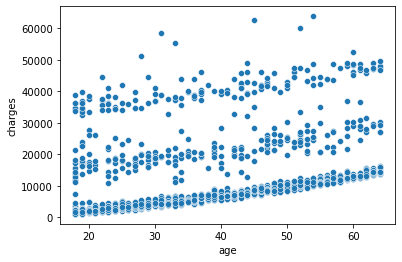

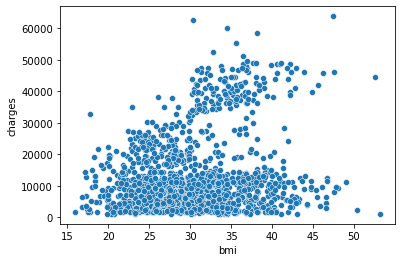

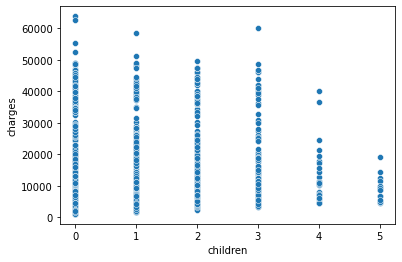

In [23]:
# Getting all numerical attributes distribution on preimum charges
num_cols=['age', 'bmi', 'children']
for c in num_cols:
    sns.scatterplot(x=c, y='charges', data=num_data)
    plt.show()

# Distribution Categorical Attributes

In [62]:
# checking the categorical attributes columns
cat_data.columns

Index(['sex', 'smoker', 'region'], dtype='object')

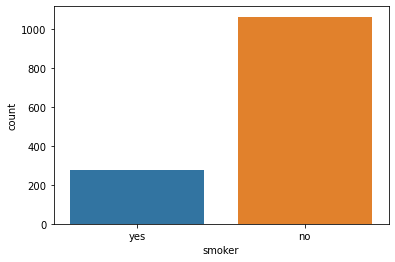

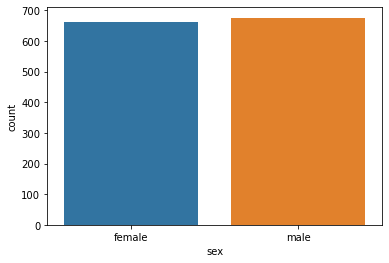

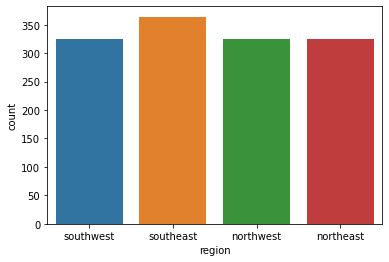

In [63]:
# Getting all categorical attributes distribution
cat_cols=['smoker', 'sex', 'region']
for c in cat_cols:
    sns.countplot(x=c, data=cat_data)
    plt.show()

# Observations:
The average insurance premium for smokers are significantly higher than non-smokers

# Visualization between various Feature

In [29]:
gp = ins.columns.to_series().groupby(ins.dtypes).groups
gp

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [31]:
# count of female/male on smoker/non-smoker
pd.crosstab(index=cat_data['smoker'], columns=cat_data['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


In [32]:
# count of smoker and non-smoker region wise
pd.crosstab(index=cat_data['smoker'], columns=cat_data['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


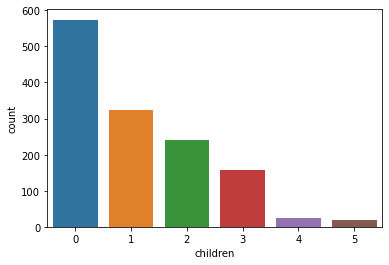

In [33]:
# Distribution on children (dependents)
sns.countplot(x=num_data['children'], data=num_data)
plt.show()

# Observation:
In the dataset, approximately 85% of the insured have less than 3 children.

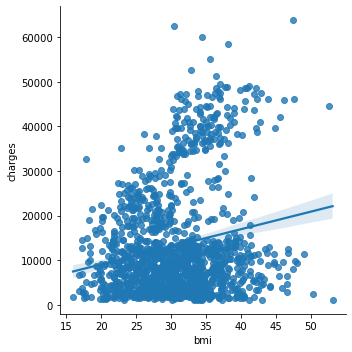

In [72]:
# Distribution of bmi vs charges
sns.lmplot(x='bmi', y='charges', data=num_data)
plt.show()

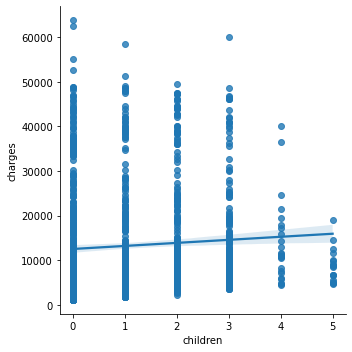

In [73]:
# childre(dependents) vs charges 
sns.lmplot(x='children', y='charges', data=num_data)
plt.show()

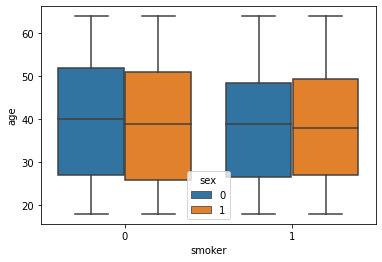

In [75]:
# smoker Vs age
sns.boxplot(x='smoker', y='age', data=ins, hue='sex')
plt.show()

# Observation
Of the total 1338 insured, 274 (20.5%) are smokers and the rest are non-smokers.
Among 274 smokers, proportion of males (159) are higher than females (115).

In [77]:
# Maximum preimum charges
ins['charges'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64>

In [38]:
# How many of the insured have the age of 64?  
df = ins[ins['age'] == ins['age'].max()]
print(df.head())
print()
print(f'Total number of insured people with the age of 64: {len(df)}.')

     age     sex    bmi  children smoker     region      charges
62    64    male  24.70         1     no  northwest  30166.61817
94    64  female  31.30         2    yes  southwest  47291.05500
199   64  female  39.33         0     no  northeast  14901.51670
328   64  female  33.80         1    yes  southwest  47928.03000
335   64    male  34.50         0     no  southwest  13822.80300

Total number of insured people with the age of 64: 22.


In [39]:
#Highest BMI members insured
ins[ins['bmi'] == ins['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [40]:
ins['charges'].mean(), ins['charges'].median()

(13270.422265141257, 9382.033)

In [41]:
# Are average premium charges for smokers significantly higher than non-smokers?
ins['charges'].groupby(ins['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [42]:
ins.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

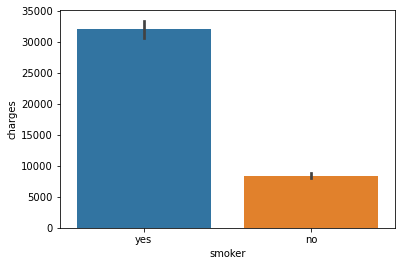

In [43]:
# yes, average premium charges for smokers are indeed significantly higher than non-smokers.
sns.barplot(x = "smoker", y = "charges", data = ins)
plt.show()

# Observations: The primum charge is higher for smoker than non-smoker

In [44]:
ins.groupby(['smoker', 'sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

In [45]:
ins.groupby(['children']).agg('count')

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,574,574,574,574,574,574
1,324,324,324,324,324,324
2,240,240,240,240,240,240
3,157,157,157,157,157,157
4,25,25,25,25,25,25
5,18,18,18,18,18,18


In [46]:
for x in ['sex', 'children', 'smoker', 'region']:
    ins[x] = ins[x].astype('category')

ins.dtypes

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

In [47]:
type(ins.dtypes)

pandas.core.series.Series

In [48]:
# Next, we select all columns of the dataFrame with datatype = category:
cat_columns = ins.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [49]:
# Finally, we transform the original columns by replacing the elements with their category codes:
ins[cat_columns] = ins[cat_columns].apply(lambda x: x.cat.codes)
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


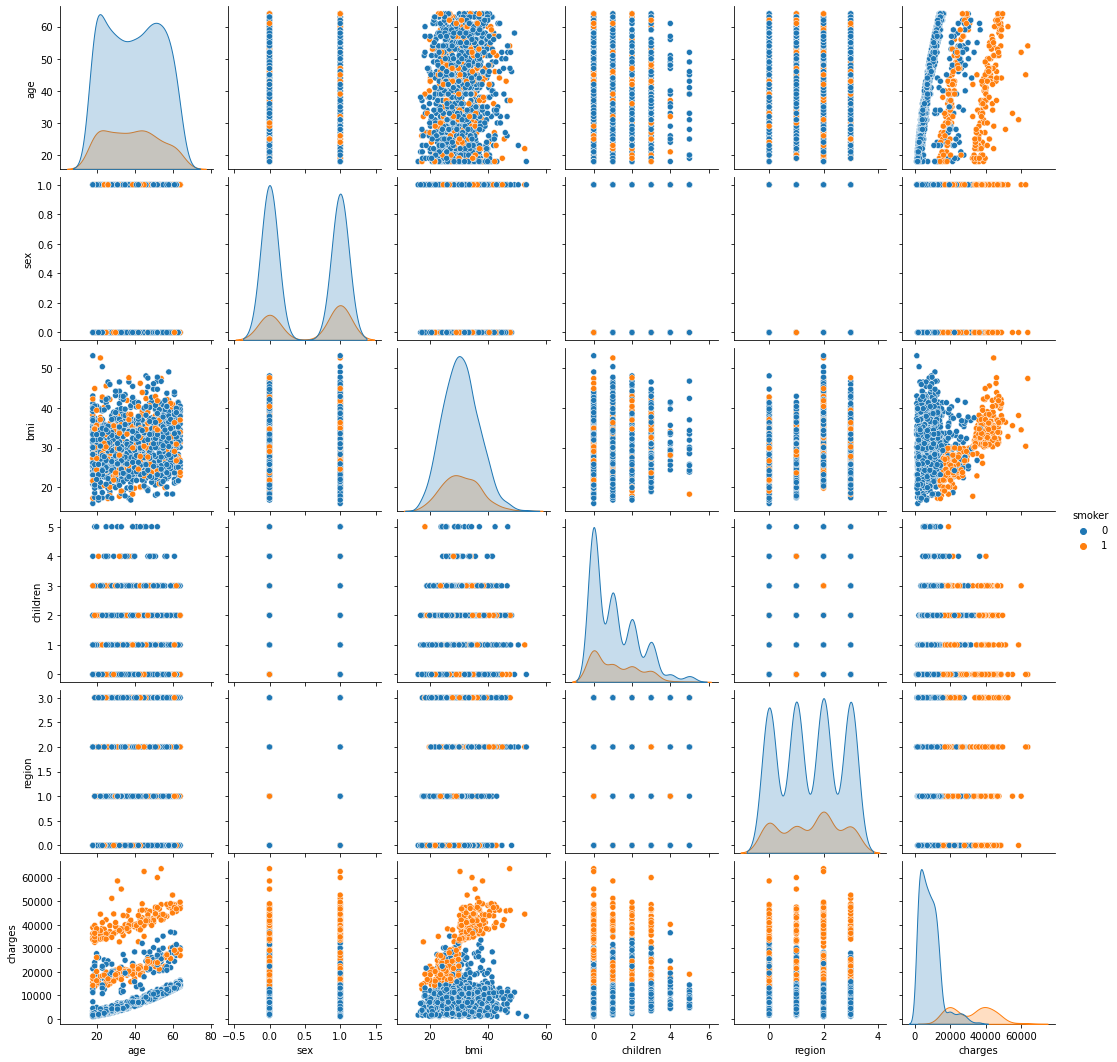

In [50]:
# plotting all columns of our dataset in a pairplot!
sns.pairplot(ins, hue  = 'smoker')
plt.show()